# 1. 航班乘客变化

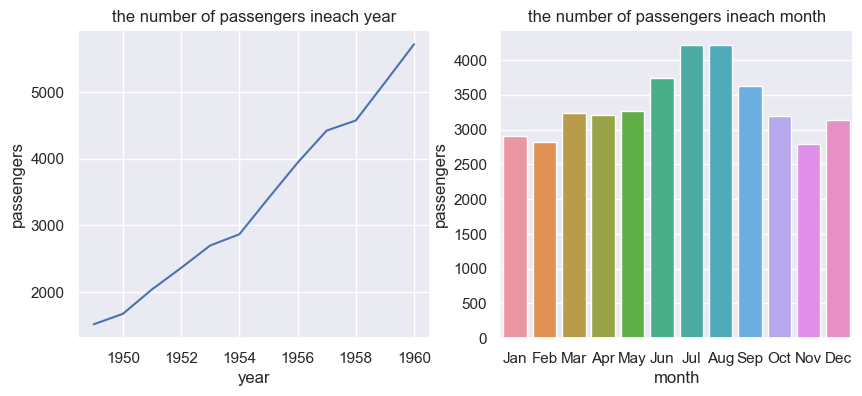

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

sns.set()
data = sns.load_dataset("flights")
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.lineplot(x='year',y='passengers',estimator='sum',data=data,errorbar=None)
plt.title('the number of passengers ineach year')
plt.subplot(1,2,2)
sns.barplot(x='month',y='passengers',estimator='sum',data=data,errorbar=None)
plt.title('the number of passengers ineach month')
plt.show()

# 2. 鸢尾花花型尺寸分析
## 萼片（sepal）和花瓣（petal）的大小关系

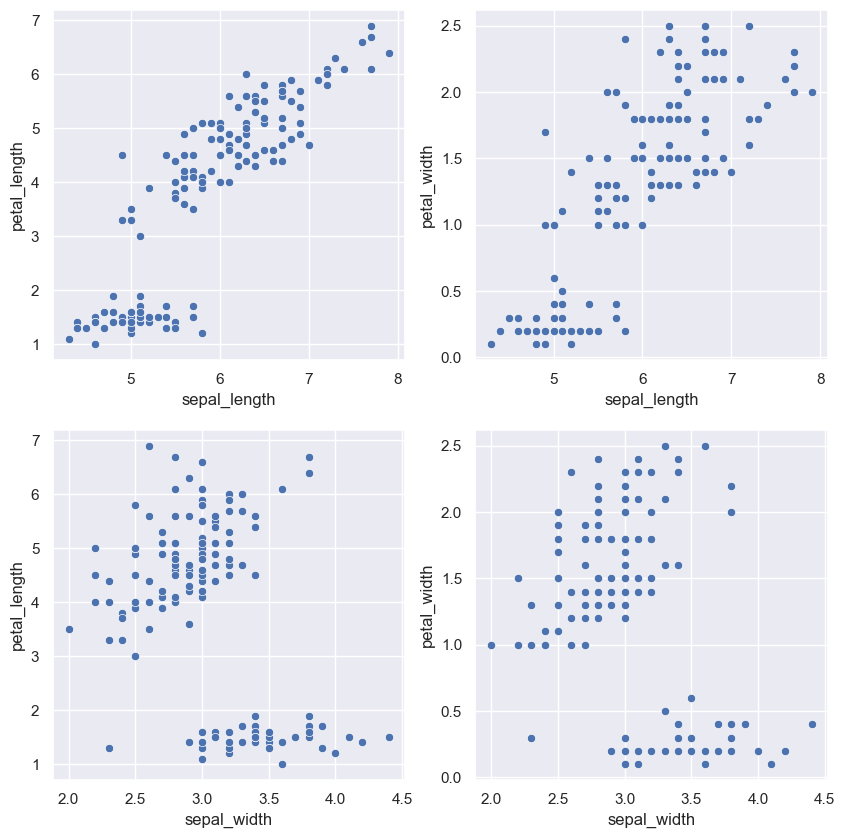

In [40]:
data = sns.load_dataset("iris")
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length', y='petal_length', data=data) 
plt.subplot(2,2,2)
sns.scatterplot(x='sepal_length', y='petal_width', data=data) 
plt.subplot(2,2,3)
sns.scatterplot(x='sepal_width', y='petal_length', data=data) 
plt.subplot(2,2,4)
sns.scatterplot(x='sepal_width', y='petal_width', data=data) 
plt.show()

## 不同种类（species）鸢尾花sepal和petal的大小关系

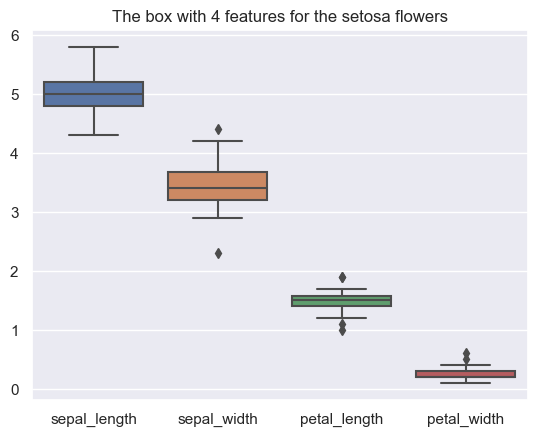

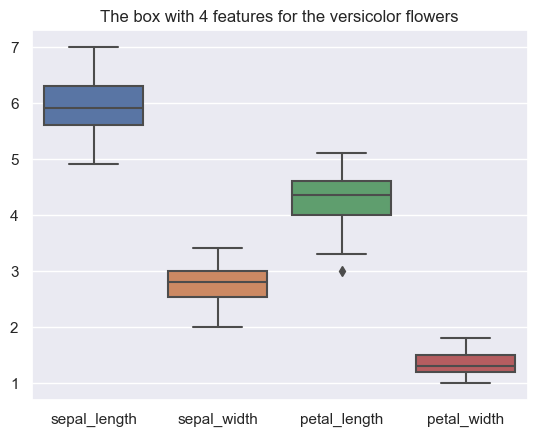

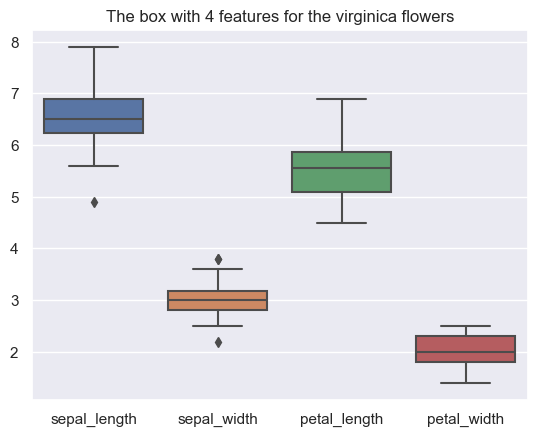

In [41]:
Species=data["species"].unique()

for Specie in Species:
    SpecieData= data.loc[data["species"] == Specie]
    sns.boxplot(data=SpecieData.loc[:,["sepal_length", "sepal_width", "petal_length", "petal_width"]])
    plt.title(f"The box with 4 features for the {Specie} flowers")
    plt.show()

## 不同种类鸢尾花萼片和花瓣大小的分布情况

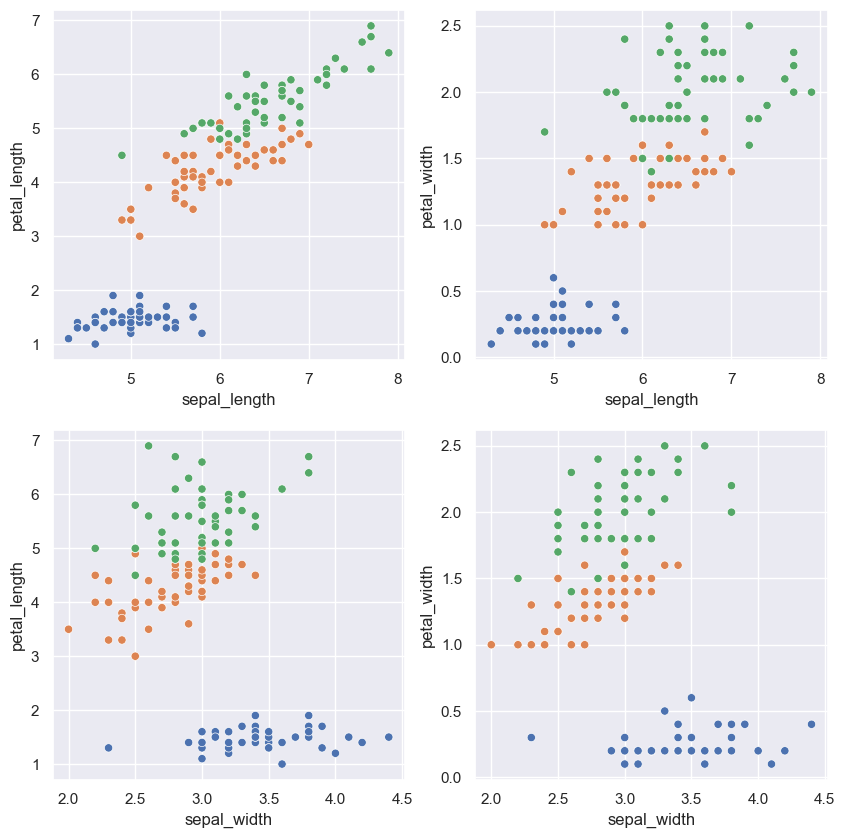

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length', y='petal_length', data=data,hue='species',legend=None) 
plt.subplot(2,2,2)
sns.scatterplot(x='sepal_length', y='petal_width', data=data,hue='species',legend=None)
plt.subplot(2,2,3)
sns.scatterplot(x='sepal_width', y='petal_length', data=data,hue='species',legend=None) 
plt.subplot(2,2,4)
sns.scatterplot(x='sepal_width', y='petal_width', data=data,hue='species',legend=None) 
plt.show()

# 3 餐厅小费情况分析
## 小费和总消费之间的关系

Text(0.5, 1.0, 'total_bill vs. tip')

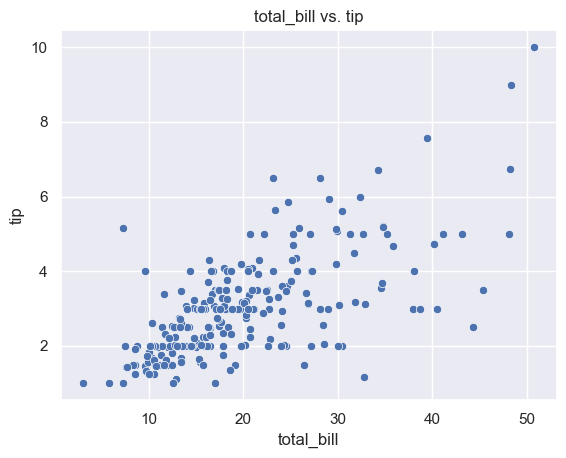

In [53]:
data = sns.load_dataset("tips")
sns.scatterplot(x='total_bill',y='tip',data=data)
plt.title('total_bill vs. tip')

## 男性顾客和女性顾客，谁更慷慨

Text(0.5, 1.0, 'the box with 2 features for the tip')

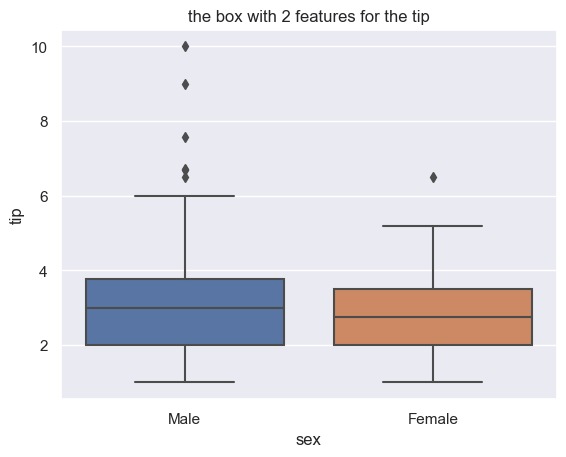

In [48]:
sns.boxplot(x='sex',y='tip',data=data)
plt.title('the box with 2 features for the tip')

## 抽烟与否是否会对小费金额产生影响

Text(0.5, 1.0, 'the box with 2 features for the tip')

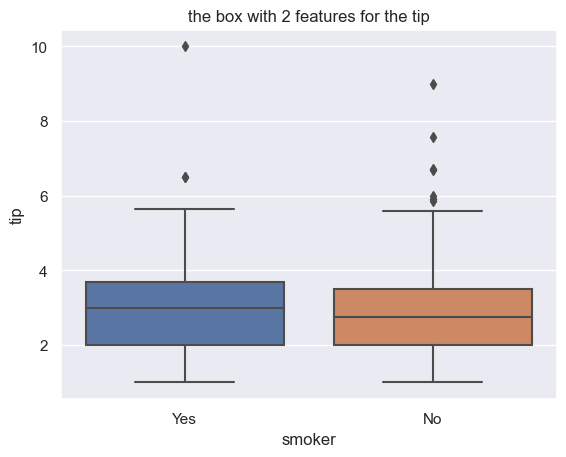

In [49]:
sns.boxplot(x='smoker',y='tip',data=data)
plt.title('the box with 2 features for the tip')

## 工作日和周末，什么时候顾客给的小费更慷慨

Text(0.5, 1.0, 'the box with 4 features for the tip')

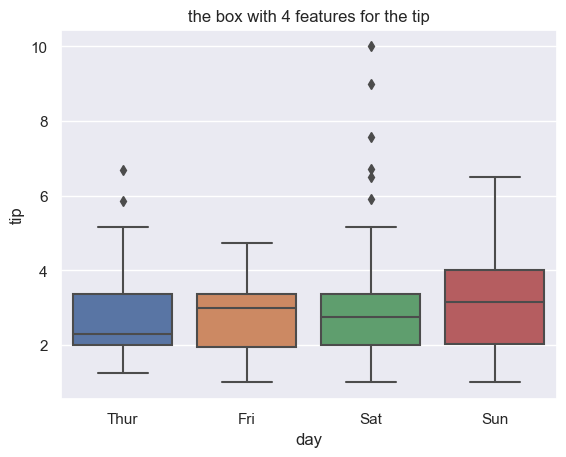

In [54]:
sns.boxplot(x='day',y='tip',data=data)
plt.title('the box with 4 features for the tip')

## 午饭和晚饭，哪一顿顾客更愿意给小费

Text(0.5, 1.0, 'the box with 2 features for the tip')

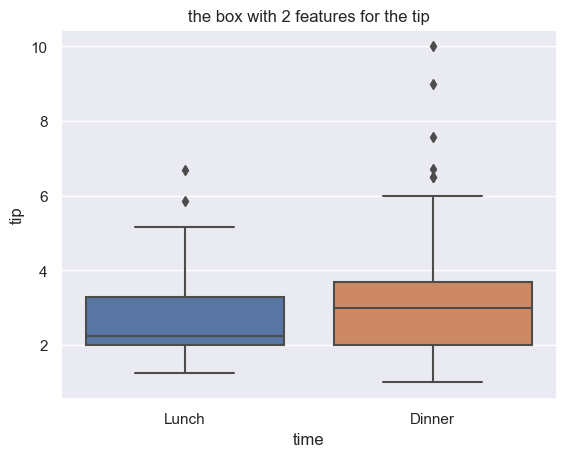

In [55]:
sns.boxplot(x='time',y='tip',data=data)
plt.title('the box with 2 features for the tip')

## 就餐人数是否会对慷慨度产生影响

Text(0.5, 1.0, 'the bos with 6 features for the tip')

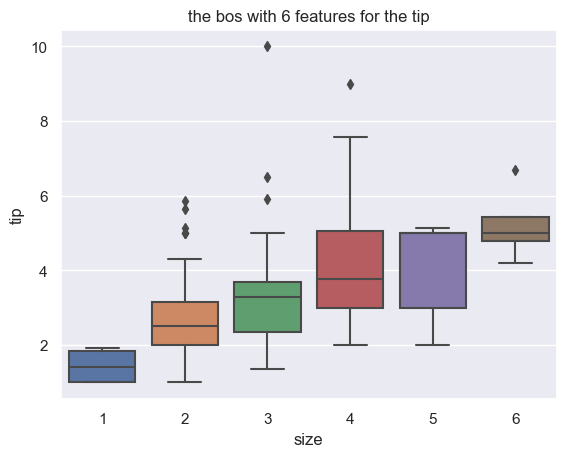

In [56]:
sns.boxplot(x='size',y='tip',data=data)
plt.title('the bos with 6 features for the tip')

## 性别+抽烟的组合因素对慷慨度的影响

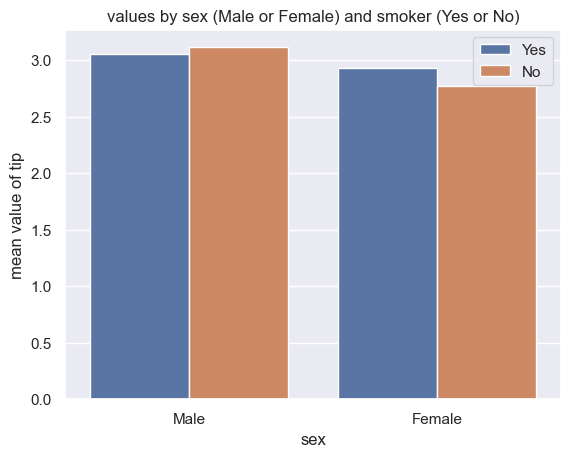

In [61]:
sns.barplot(x="sex", y="tip", hue="smoker", data=data,errorbar=None)
plt.legend()
plt.ylabel('mean value of tip')
plt.title('values by sex (Male or Female) and smoker (Yes or No)')
plt.show()

# 4 泰坦尼克号海难幸存状况分析 
## 不同仓位等级中幸存和遇难的乘客比例

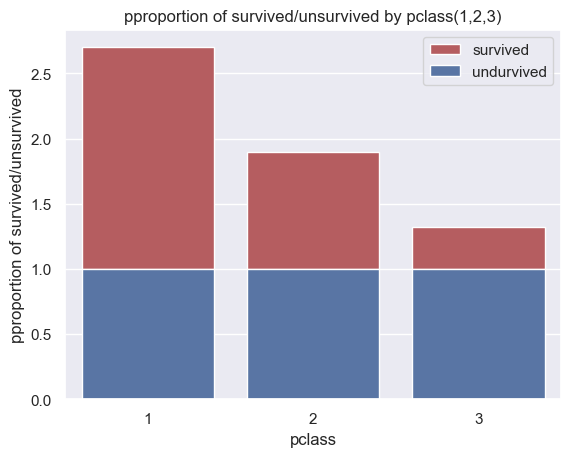

In [27]:
data = sns.load_dataset("titanic")
TotNum=data['pclass'].value_counts()
SurviveNum=data.groupby(['pclass'])['survived'].agg('sum')
data1=pd.concat([TotNum,SurviveNum],axis=1).reset_index()
data1.columns=['pclass','total','survived']
data1['unsurvived']=data1['total']-data1['survived']
data1['survived_prop']=data1['survived']/data1['unsurvived']
data1['unsurvived_prop']=data1['unsurvived']/data1['unsurvived']
plt.figure()
sns.barplot(x='pclass',y='survived_prop',data=data1,label='survived',bottom=True,color='r')
sns.barplot(x='pclass',y='unsurvived_prop',data=data1,label='undurvived',color='b')
plt.ylabel('pproportion of survived/unsurvived')
plt.legend()
plt.title('pproportion of survived/unsurvived by pclass(1,2,3)')
plt.show()

## 不同性别的幸存比例

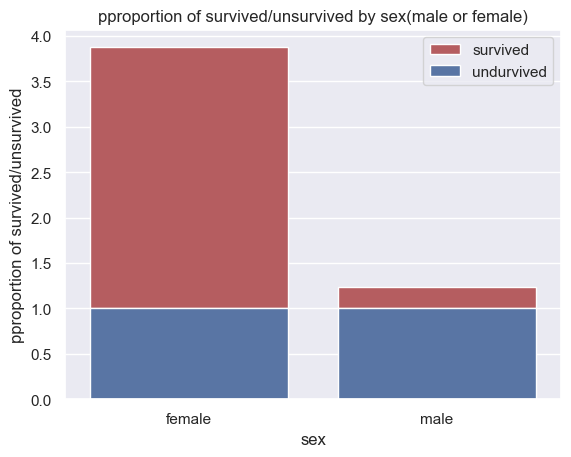

In [30]:
data2=pd.concat([data.groupby('sex')['survived'].agg('sum'),data['sex'].value_counts()],axis=1).reset_index()
data2.columns=['sex','survived','total']
data2['unsurvived']=data2['total']-data2['survived']
data2['survived_prop']=data2['survived']/data2['unsurvived']
data2['unsurvived_prop']=data2['unsurvived']/data2['unsurvived']
plt.figure()
sns.barplot(x='sex',y='survived_prop',data=data2,label='survived',bottom=True,color='r')
sns.barplot(x='sex',y='unsurvived_prop',data=data2,label='undurvived',color='b')
plt.ylabel('pproportion of survived/unsurvived')
plt.legend()
plt.title('pproportion of survived/unsurvived by sex(male or female)')
plt.show()

## 幸存和遇难乘客的票价分布

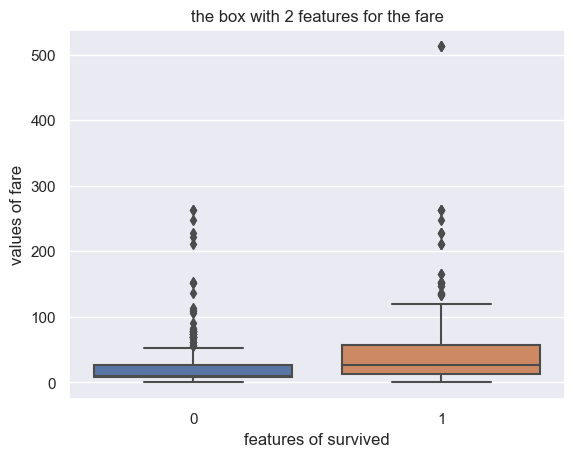

In [66]:
sns.boxplot(x="survived", y="fare", data=data)
plt.xlabel('features of survived')
plt.ylabel('values of fare')
plt.title('the box with 2 features for the fare')

## 幸存和遇难乘客的年龄分布

Text(0.5, 1.0, 'the box with 2 features for the age')

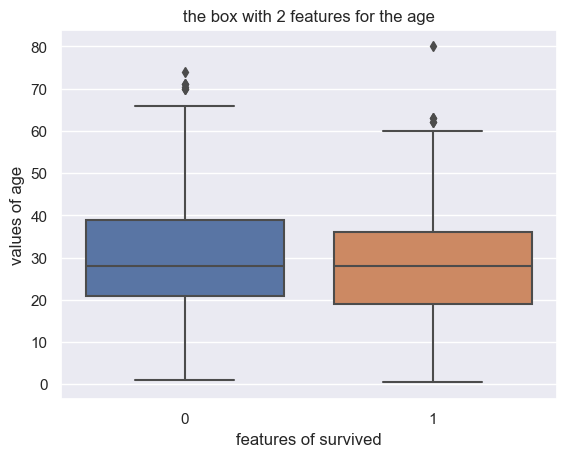

In [67]:
sns.boxplot(x="survived", y="age", data=data)
plt.xlabel('features of survived')
plt.ylabel('values of age')
plt.title('the box with 2 features for the age')

## 不同上船港口的乘客仓位等级分布

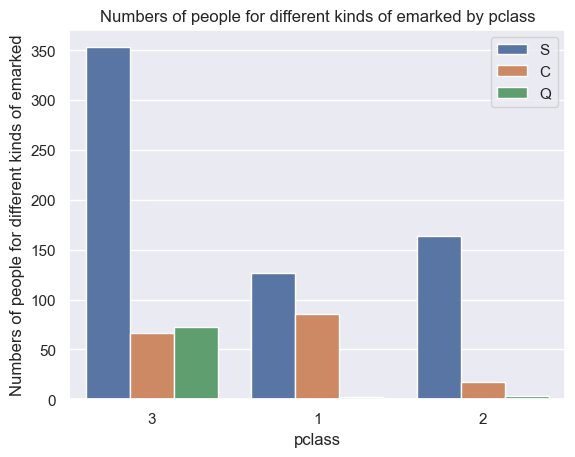

In [126]:
data['other']=np.ones(len(data))
sns.barplot(x="pclass", y="other", hue="embarked", estimator="sum", data=data)
plt.legend()
plt.xlabel('pclass')
plt.ylabel('Numbers of people for different kinds of emarked')
plt.title('Numbers of people for different kinds of emarked by pclass')

## 幸存和遇难乘客堂兄弟姐妹的数量分布

Text(0.5, 1.0, 'the box with 2 features for the sibsp')

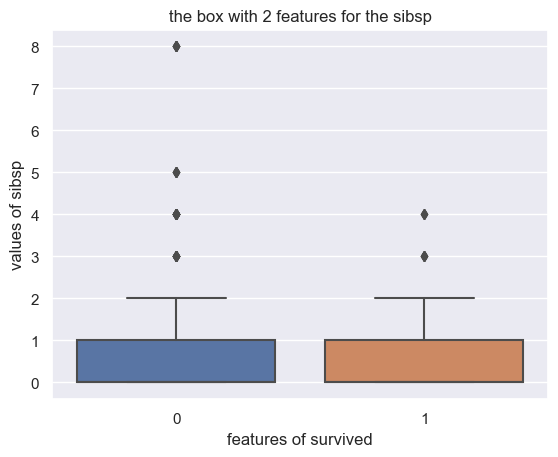

In [127]:
sns.boxplot(x="survived", y="sibsp", data=data)
plt.xlabel('features of survived')
plt.ylabel('values of sibsp')
plt.title('the box with 2 features for the sibsp')

## 幸存和遇难乘客父母子女的数量分布

Text(0.5, 1.0, 'the box with 2 features for the parch')

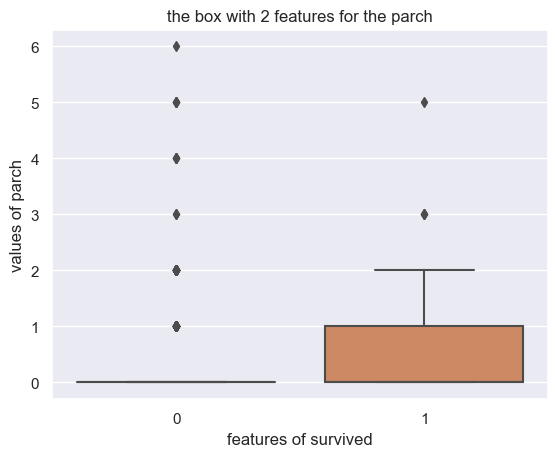

In [128]:
sns.boxplot(x="survived", y="parch", data=data)
plt.xlabel('features of survived')
plt.ylabel('values of parch')
plt.title('the box with 2 features for the parch')

## 单独乘船与否和幸存之间有没有联系

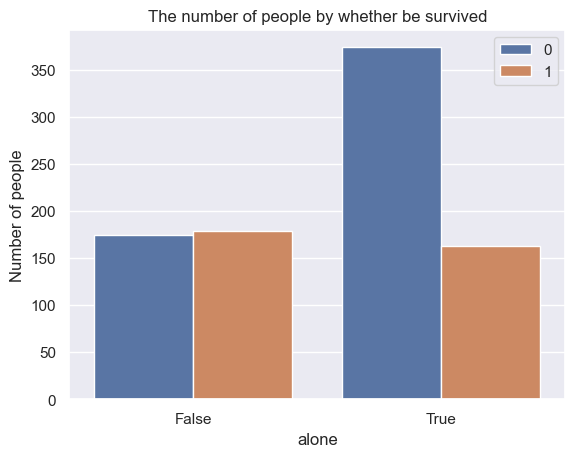

In [130]:
sns.barplot(x="alone", y="people", hue="survived", estimator="sum", data=data)
plt.title("The number of people by whether be survived")
plt.ylabel("Number of people")
plt.legend()

In [56]:
data8

survived,0,1
alone,,
False,175,179
True,374,163
